In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Perform the necessary imports
from scipy.cluster.hierarchy import linkage,dendrogram 

from sklearn.cluster import KMeans

In [2]:
datafile = open('Grains/seeds.csv', 'r')
datareader = csv.reader(datafile, delimiter=',')
data = []
for row in datareader:
    row_item=[]
    for items in row:
        row_item.append(float(items))
    data.append(row_item)
samples=np.array(data)[:,:-1]
varieties_number = np.array(data)[:,-1]

In [3]:
varieties = pd.read_csv('Grains/varieties.csv')
varieties=varieties['varieties'].values

## K-MEANS

In [4]:
inertia=[]
for i in range(1,10):
    model = KMeans(n_clusters= i)
    model.fit(samples)
    inertia.append(model.inertia_)
    

C:\Users\lfc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


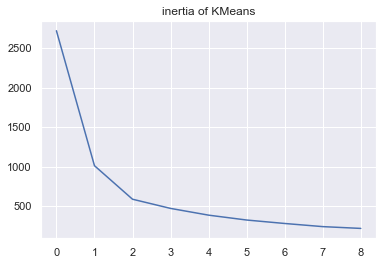

In [5]:
plt.plot(inertia)
plt.title("inertia of KMeans")
plt.show()

In [6]:
model = KMeans(n_clusters = 3)
model.fit(samples)
labels = model.predict(samples)

In [7]:
pd.crosstab(labels , varieties)

col_0,Canadian wheat,Kama wheat,Rosa wheat
row_0,,,
0,2,60,10
1,68,9,0
2,0,1,60


#### can also use the below random choice to take random samples from the samples

In [8]:
indx = np.random.choice(len(samples),30,False)

## LINKAGE AND DENDOGRAM

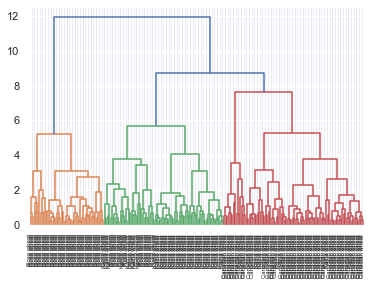

In [9]:
# Calculate the linkage: mergings
mergings = linkage(samples , method = 'complete')

dendrogram(mergings,labels=varieties,leaf_rotation=90,leaf_font_size=6)
plt.show()

In [11]:
from scipy.cluster.hierarchy import fcluster

# Use fcluster to extract labels: labels
labels = fcluster(mergings, 8, criterion='distance')

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)

varieties  Canadian wheat  Kama wheat  Rosa wheat
labels                                           
1                       0           0          47
2                       0          52          23
3                      70          18           0


## t-SNE(t-distributed stochastic neighbor embedding)

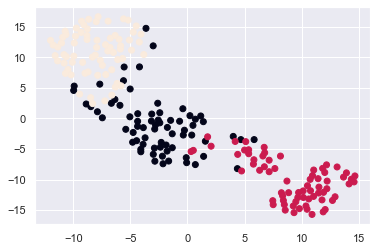

In [15]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate = 200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(samples)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs,ys,c=varieties_number)
plt.show()

## DECOMPOSITION

##### PCA(PRINCIPAL COMPONENT ANALYSIS)

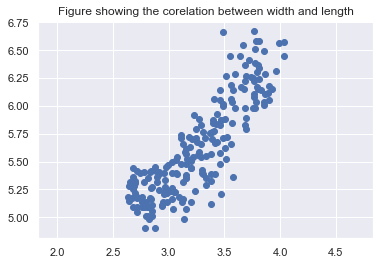

0.8604149377143469


In [21]:
# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Assign the 0th column of grains: width
width = samples[:,4]

# Assign the 1st column of grains: length
length = samples[:,3]

# Scatter plot width vs length
plt.scatter(width, length)
plt.axis('equal')
plt.title("Figure showing the corelation between width and length")
plt.show()

# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width,length)

# Display the correlation
print(correlation)

As, we can see their is a high corelation between the width and height , so we now
use PRINCIPLE COMPONENT ANALYSIS(PCA), one of the dimentional reduction method
to remove the corelation.

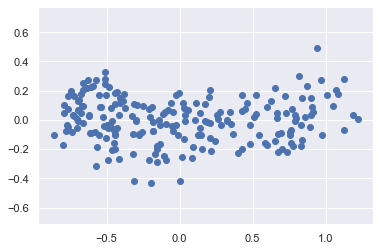

-6.938893903907228e-18


In [20]:
# Import PCA
from sklearn.decomposition import PCA

# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(samples[:,3:5])

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation)

We've successfully decorrelated the  measurements with PCA!

### The first principal component

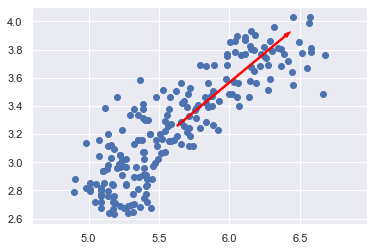

In [22]:

# Make a scatter plot of the untransformed points
plt.scatter(samples[:,3], samples[:,4])

# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(samples[:,3:5])

# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0,:]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()

The direction in which the data varies the most.